In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

In [4]:
data = pd.read_csv('datasets/heart_2020_cleaned.csv')

In [5]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
data.shape

(319795, 18)

In [8]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [10]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [11]:
data.describe(include = "object")

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [12]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [14]:
duplicate = data.duplicated()
print(duplicate.sum())
data[duplicate]

18078


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


## Data Visualization

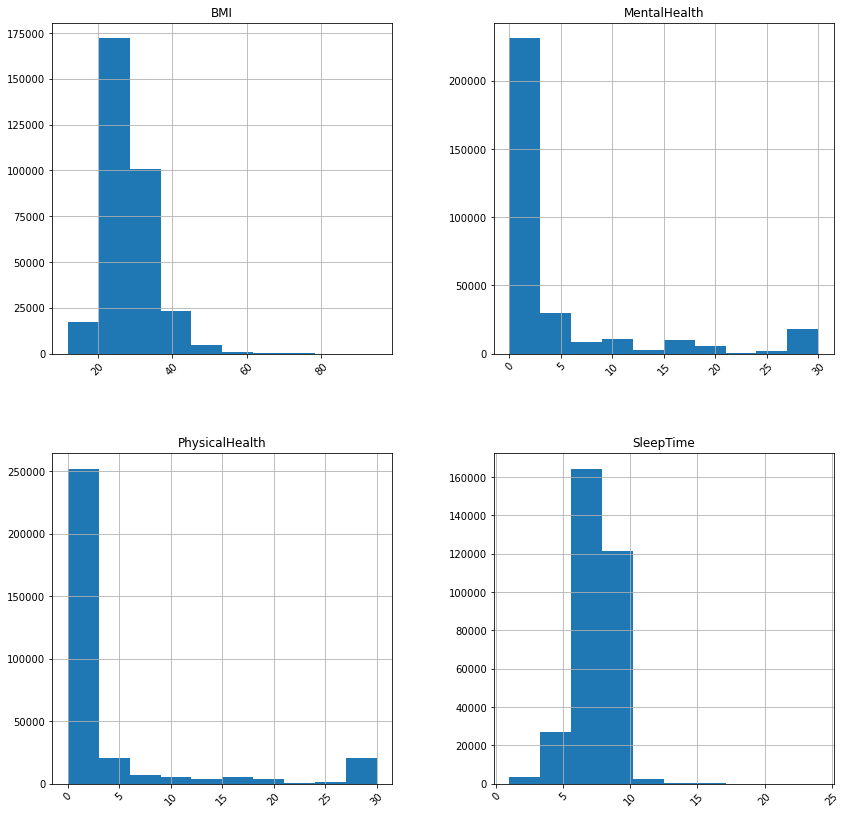

In [15]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

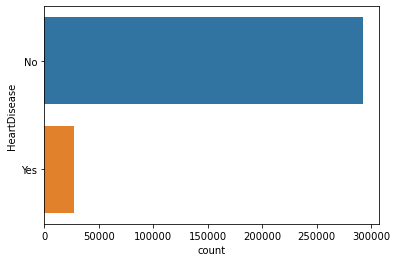

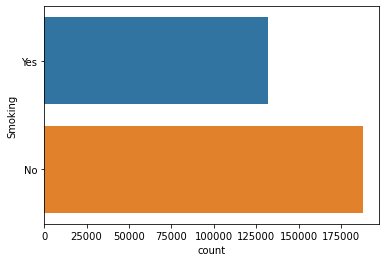

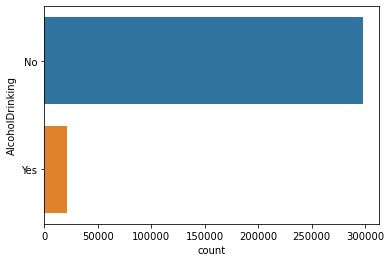

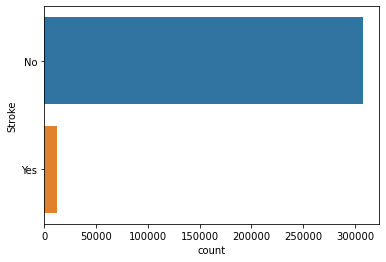

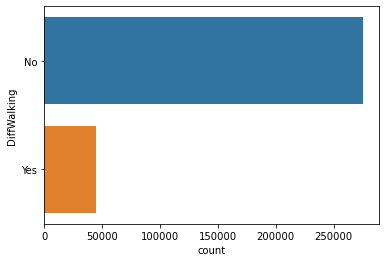

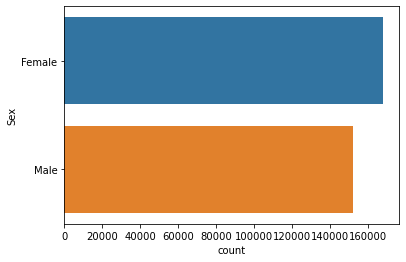

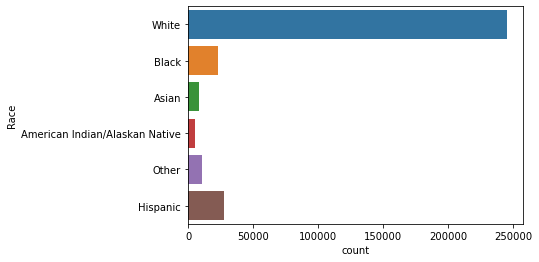

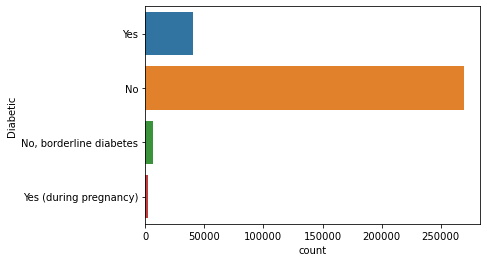

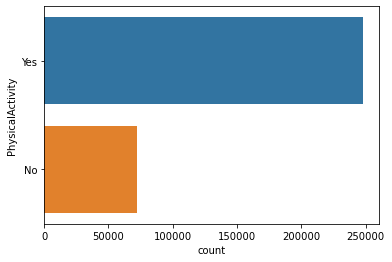

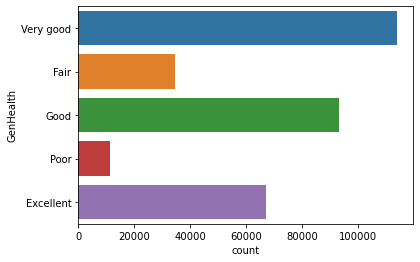

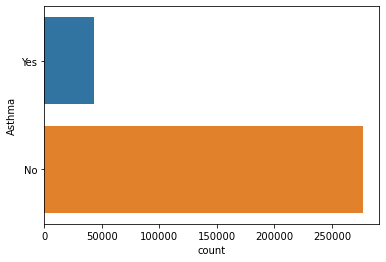

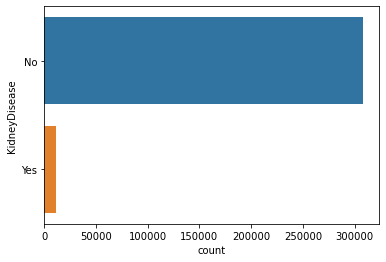

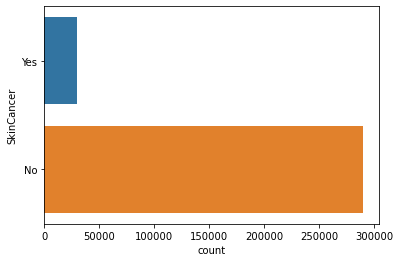

In [17]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.countplot(y=column, data=data)
        plt.show()

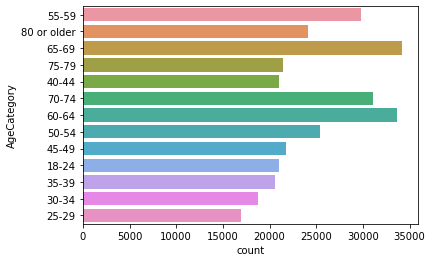

In [18]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() > 10:
        sns.countplot(y=column, data=data)
        plt.show()

In [19]:
corrs = data.corr()
corrs

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


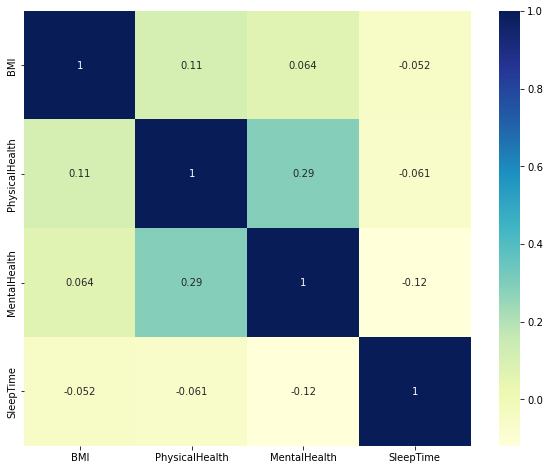

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='YlGnBu', annot=True)
plt.show()

## Data cleaning Phase

In [21]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'HeartDisease'.
data['HeartDisease'] = label_encoder.fit_transform(data['HeartDisease'])
data['Smoking'] = label_encoder.fit_transform(data['Smoking'])
data['AlcoholDrinking'] = label_encoder.fit_transform(data['AlcoholDrinking'])
data['Stroke'] = label_encoder.fit_transform(data['Stroke'])
data['DiffWalking']= label_encoder.fit_transform(data['DiffWalking'])
data['Sex']= label_encoder.fit_transform(data['Sex'])
data['Diabetic']= label_encoder.fit_transform(data['Diabetic'])
data['PhysicalActivity']= label_encoder.fit_transform(data['PhysicalActivity'])
data['GenHealth']= label_encoder.fit_transform(data['GenHealth'])
data['Asthma']= label_encoder.fit_transform(data['Asthma'])
data['KidneyDisease']= label_encoder.fit_transform(data['KidneyDisease'])
data['SkinCancer']= label_encoder.fit_transform(data['SkinCancer'])
data['Race']= label_encoder.fit_transform(data['Race'])
data['AgeCategory']= label_encoder.fit_transform(data['AgeCategory'])

In [22]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


Here, all the values are converted into numerical from categorical

In [23]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [24]:
cols = ['HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']
data[cols] = data[cols].astype('float')

In [26]:
for column in data.columns:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
    
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,1.0,0.666667,1.0,1.00,0.173913,1.0,0.0,1.0
1,0.0,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,1.00,0.260870,0.0,0.0,0.0
2,0.0,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,1.0,0.666667,1.0,0.25,0.304348,1.0,0.0,0.0
3,0.0,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,1.0,0.000000,0.0,0.50,0.217391,0.0,0.0,1.0
4,0.0,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,0.0,0.333333,1.0,0.000000,1.0,1.00,0.304348,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.185802,1.0,0.0,0.0,0.233333,0.0,1.0,1.0,0.666667,0.6,0.666667,0.0,0.25,0.217391,1.0,0.0,0.0
319791,0.0,0.215139,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.250000,0.6,0.000000,1.0,1.00,0.173913,1.0,0.0,0.0
319792,0.0,0.147531,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.416667,0.6,0.000000,1.0,0.50,0.217391,0.0,0.0,0.0
319793,0.0,0.250996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.083333,0.6,0.000000,0.0,0.50,0.478261,0.0,0.0,0.0


In [27]:
data[data.columns].round(decimals= 3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055,1.0,0.0,0.0,0.100,1.0,0.0,0.0,0.583,1.0,0.667,1.0,1.00,0.174,1.0,0.0,1.0
1,0.0,0.100,0.0,0.0,1.0,0.000,0.0,0.0,0.0,1.000,1.0,0.000,1.0,1.00,0.261,0.0,0.0,0.0
2,0.0,0.176,1.0,0.0,0.0,0.667,1.0,0.0,1.0,0.750,1.0,0.667,1.0,0.25,0.304,1.0,0.0,0.0
3,0.0,0.147,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.917,1.0,0.000,0.0,0.50,0.217,0.0,0.0,1.0
4,0.0,0.141,0.0,0.0,0.0,0.933,0.0,1.0,0.0,0.333,1.0,0.000,1.0,1.00,0.304,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.186,1.0,0.0,0.0,0.233,0.0,1.0,1.0,0.667,0.6,0.667,0.0,0.25,0.217,1.0,0.0,0.0
319791,0.0,0.215,1.0,0.0,0.0,0.000,0.0,0.0,1.0,0.250,0.6,0.000,1.0,1.00,0.174,1.0,0.0,0.0
319792,0.0,0.148,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.417,0.6,0.000,1.0,0.50,0.217,0.0,0.0,0.0
319793,0.0,0.251,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.083,0.6,0.000,0.0,0.50,0.478,0.0,0.0,0.0


## Outlier detection using Isolation forest

In [28]:
# Isolation forest to find outlier
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data)

IsolationForest(contamination=0.01, random_state=10)

In [29]:
# predictions
y_pred_outliers = clf.predict(data)

In [30]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [31]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,1.0,0.666667,1.0,1.00,0.173913,1.0,0.0,1.0
1,0.0,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,1.00,0.260870,0.0,0.0,0.0
2,0.0,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,1.0,0.666667,1.0,0.25,0.304348,1.0,0.0,0.0
3,0.0,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,1.0,0.000000,0.0,0.50,0.217391,0.0,0.0,1.0
4,0.0,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,0.0,0.333333,1.0,0.000000,1.0,1.00,0.304348,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.185802,1.0,0.0,0.0,0.233333,0.0,1.0,1.0,0.666667,0.6,0.666667,0.0,0.25,0.217391,1.0,0.0,0.0
319791,0.0,0.215139,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.250000,0.6,0.000000,1.0,1.00,0.173913,1.0,0.0,0.0
319792,0.0,0.147531,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.416667,0.6,0.000000,1.0,0.50,0.217391,0.0,0.0,0.0
319793,0.0,0.250996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.083333,0.6,0.000000,0.0,0.50,0.478261,0.0,0.0,0.0


In [32]:
data['scores'] = clf.decision_function(data)

In [33]:
data['anomaly'] = clf.predict(data.iloc[:,0:18])

In [34]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,scores,anomaly
0,0.0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,1.0,0.666667,1.0,1.00,0.173913,1.0,0.0,1.0,0.030544,1
1,0.0,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,1.00,0.260870,0.0,0.0,0.0,0.175116,1
2,0.0,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,1.0,0.666667,1.0,0.25,0.304348,1.0,0.0,0.0,0.062749,1
3,0.0,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,1.0,0.000000,0.0,0.50,0.217391,0.0,0.0,1.0,0.176656,1
4,0.0,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,0.0,0.333333,1.0,0.000000,1.0,1.00,0.304348,0.0,0.0,0.0,0.145187,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.185802,1.0,0.0,0.0,0.233333,0.0,1.0,1.0,0.666667,0.6,0.666667,0.0,0.25,0.217391,1.0,0.0,0.0,0.046423,1
319791,0.0,0.215139,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.250000,0.6,0.000000,1.0,1.00,0.173913,1.0,0.0,0.0,0.170915,1
319792,0.0,0.147531,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.416667,0.6,0.000000,1.0,0.50,0.217391,0.0,0.0,0.0,0.255189,1
319793,0.0,0.250996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.083333,0.6,0.000000,0.0,0.50,0.478261,0.0,0.0,0.0,0.174832,1


In [35]:
data[data['anomaly'] == -1]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,scores,anomaly
35,1.0,0.253048,1.0,0.0,1.0,0.333333,0.000000,1.0,1.0,0.916667,1.0,0.666667,1.0,0.75,0.130435,0.0,0.0,1.0,-0.007282,-1
142,1.0,0.234939,0.0,1.0,1.0,0.666667,0.666667,1.0,1.0,0.750000,0.4,0.000000,0.0,0.25,0.260870,1.0,0.0,0.0,-0.041992,-1
162,1.0,0.172281,0.0,0.0,0.0,1.000000,1.000000,1.0,0.0,1.000000,1.0,0.000000,0.0,0.75,0.391304,0.0,0.0,1.0,-0.005666,-1
165,1.0,0.203670,1.0,0.0,0.0,0.100000,1.000000,1.0,0.0,0.916667,1.0,0.666667,0.0,0.25,0.304348,1.0,0.0,1.0,-0.004527,-1
270,1.0,0.242183,1.0,0.0,1.0,0.333333,1.000000,1.0,1.0,0.666667,1.0,0.666667,0.0,0.25,0.086957,0.0,0.0,0.0,-0.011269,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319584,1.0,0.230834,1.0,0.0,0.0,0.333333,1.000000,1.0,1.0,0.666667,0.6,0.666667,0.0,0.75,0.217391,1.0,1.0,0.0,-0.030659,-1
319619,1.0,0.329470,0.0,0.0,1.0,0.100000,0.000000,1.0,0.0,0.750000,0.6,0.000000,0.0,0.25,0.130435,1.0,1.0,0.0,-0.004897,-1
319721,1.0,0.329349,0.0,0.0,0.0,1.000000,1.000000,1.0,0.0,0.666667,0.6,0.666667,0.0,0.25,0.304348,1.0,1.0,0.0,-0.035605,-1
319732,0.0,0.081734,0.0,1.0,0.0,1.000000,0.500000,1.0,1.0,0.583333,0.6,0.000000,0.0,0.25,0.217391,1.0,0.0,0.0,-0.002254,-1


In [36]:
cols = ['scores', 'anomaly']
data.drop("scores", axis=1, inplace=True)
data.drop("anomaly", axis=1, inplace=True)

In [37]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,1.0,0.666667,1.0,1.00,0.173913,1.0,0.0,1.0
1,0.0,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,1.00,0.260870,0.0,0.0,0.0
2,0.0,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,1.0,0.666667,1.0,0.25,0.304348,1.0,0.0,0.0
3,0.0,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,1.0,0.000000,0.0,0.50,0.217391,0.0,0.0,1.0
4,0.0,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,0.0,0.333333,1.0,0.000000,1.0,1.00,0.304348,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.185802,1.0,0.0,0.0,0.233333,0.0,1.0,1.0,0.666667,0.6,0.666667,0.0,0.25,0.217391,1.0,0.0,0.0
319791,0.0,0.215139,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.250000,0.6,0.000000,1.0,1.00,0.173913,1.0,0.0,0.0
319792,0.0,0.147531,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.416667,0.6,0.000000,1.0,0.50,0.217391,0.0,0.0,0.0
319793,0.0,0.250996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.083333,0.6,0.000000,0.0,0.50,0.478261,0.0,0.0,0.0


## Feature Engineering

In [44]:
#install the package
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13153 sha256=6eedc19db51cb0e864baeaac3ee9b1f518d046a371cbc842a15c148f03a20451
  Stored in directory: c:\users\rbs\appdata\local\pip\cache\wheels\5c\80\75\b631985b161d4a29cc0cf94b5f64b00be6297b0968ff1337ce
Successfully built ppscore


In [38]:
import ppscore as pps

In [39]:
pps.score(data, "Smoking", "HeartDisease")

{'x': 'Smoking',
 'y': 'HeartDisease',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.086,
 'model_score': 0.1557636033821029,
 'model': DecisionTreeRegressor()}

In [40]:
matrix_pps = pps.matrix(data)
matrix_pps

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,HeartDisease,HeartDisease,1.0,predict_itself,True,None,0.000000,1.000000,None
1,HeartDisease,BMI,0.0,regression,True,mean absolute error,0.055835,0.056666,DecisionTreeRegressor()
2,HeartDisease,Smoking,0.0,regression,True,mean absolute error,0.410600,0.479598,DecisionTreeRegressor()
3,HeartDisease,AlcoholDrinking,0.0,regression,True,mean absolute error,0.068000,0.126485,DecisionTreeRegressor()
4,HeartDisease,Stroke,0.0,regression,True,mean absolute error,0.032800,0.061556,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
319,SkinCancer,GenHealth,0.0,regression,True,mean absolute error,0.317850,0.329904,DecisionTreeRegressor()
320,SkinCancer,SleepTime,0.0,regression,True,mean absolute error,0.042730,0.043412,DecisionTreeRegressor()
321,SkinCancer,Asthma,0.0,regression,True,mean absolute error,0.128600,0.224197,DecisionTreeRegressor()
322,SkinCancer,KidneyDisease,0.0,regression,True,mean absolute error,0.033800,0.065292,DecisionTreeRegressor()


In [41]:
corrs = data.corr()
corrs

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


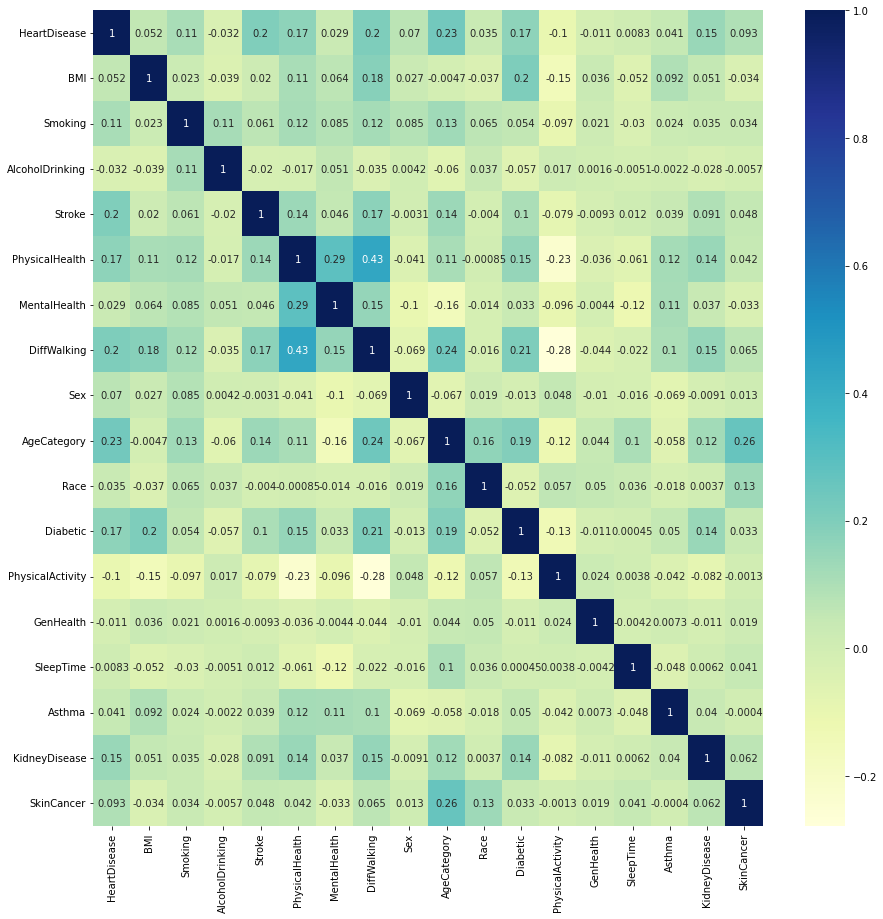

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(corrs, cmap='YlGnBu', annot=True)
plt.show()

## Univariate Feature Selection for feature engineering

In [43]:
# from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [44]:
# array = dataset1.values
X = data.iloc[:,1:18]
Y = data.iloc[:,0]

In [45]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,1.0,0.666667,1.0,1.00,0.173913,1.0,0.0,1.0
1,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,1.00,0.260870,0.0,0.0,0.0
2,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,1.0,0.666667,1.0,0.25,0.304348,1.0,0.0,0.0
3,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,1.0,0.000000,0.0,0.50,0.217391,0.0,0.0,1.0
4,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,0.0,0.333333,1.0,0.000000,1.0,1.00,0.304348,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.185802,1.0,0.0,0.0,0.233333,0.0,1.0,1.0,0.666667,0.6,0.666667,0.0,0.25,0.217391,1.0,0.0,0.0
319791,0.215139,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.250000,0.6,0.000000,1.0,1.00,0.173913,1.0,0.0,0.0
319792,0.147531,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.416667,0.6,0.000000,1.0,0.50,0.217391,0.0,0.0,0.0
319793,0.250996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.083333,0.6,0.000000,0.0,0.50,0.478261,0.0,0.0,0.0


In [46]:
Y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
319790    1.0
319791    0.0
319792    0.0
319793    0.0
319794    0.0
Name: HeartDisease, Length: 319795, dtype: float64

In [47]:
array_x = X.values
array_y = Y.values

In [48]:
# feature extraction
test = SelectKBest(score_func = chi2, k = 4)
fit = test.fit(array_x, array_y)

# summarize scores
set_printoptions(precision = 3)
print(fit.scores_)

features = fit.transform(array_x)

[2.567e+01 2.182e+03 3.067e+02 1.192e+04 5.825e+03 1.415e+02 1.115e+04
 8.232e+02 2.833e+03 2.597e+01 5.175e+03 7.188e+02 1.037e+01 3.260e-01
 4.756e+02 6.494e+03 2.525e+03]


In [49]:
cols = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer']
for i in range(len(fit.scores_)):
               print(cols[i]," : ", fit.scores_[i])

BMI  :  25.671173454665837
Smoking  :  2181.9530231031317
AlcoholDrinking  :  306.69327027017357
Stroke  :  11922.577647178325
PhysicalHealth  :  5825.050997459301
MentalHealth  :  141.4563669391839
DiffWalking  :  11154.414930638695
Sex  :  823.1956712923966
AgeCategory  :  2832.6158710840537
Race  :  25.966874875087665
Diabetic  :  5175.468799597974
PhysicalActivity  :  718.810142010766
GenHealth  :  10.374181801258523
SleepTime  :  0.32604264162946905
Asthma  :  475.64783537825235
KidneyDisease  :  6493.654142687115
SkinCancer  :  2525.122509296585


In [50]:
data[data.columns].round(decimals= 3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055,1.0,0.0,0.0,0.100,1.0,0.0,0.0,0.583,1.0,0.667,1.0,1.00,0.174,1.0,0.0,1.0
1,0.0,0.100,0.0,0.0,1.0,0.000,0.0,0.0,0.0,1.000,1.0,0.000,1.0,1.00,0.261,0.0,0.0,0.0
2,0.0,0.176,1.0,0.0,0.0,0.667,1.0,0.0,1.0,0.750,1.0,0.667,1.0,0.25,0.304,1.0,0.0,0.0
3,0.0,0.147,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.917,1.0,0.000,0.0,0.50,0.217,0.0,0.0,1.0
4,0.0,0.141,0.0,0.0,0.0,0.933,0.0,1.0,0.0,0.333,1.0,0.000,1.0,1.00,0.304,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.186,1.0,0.0,0.0,0.233,0.0,1.0,1.0,0.667,0.6,0.667,0.0,0.25,0.217,1.0,0.0,0.0
319791,0.0,0.215,1.0,0.0,0.0,0.000,0.0,0.0,1.0,0.250,0.6,0.000,1.0,1.00,0.174,1.0,0.0,0.0
319792,0.0,0.148,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.417,0.6,0.000,1.0,0.50,0.217,0.0,0.0,0.0
319793,0.0,0.251,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.083,0.6,0.000,0.0,0.50,0.478,0.0,0.0,0.0


In [51]:
cols = ['BMI', 'Race', 'GenHealth', 'SleepTime']

data.drop(cols, axis = 1, inplace = True)

In [52]:
data

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0.0,1.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,0.666667,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,0.666667,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,0.000000,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.933333,0.0,1.0,0.0,0.333333,0.000000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,1.0,0.0,0.0,0.233333,0.0,1.0,1.0,0.666667,0.666667,0.0,1.0,0.0,0.0
319791,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.250000,0.000000,1.0,1.0,0.0,0.0
319792,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.416667,0.000000,1.0,0.0,0.0,0.0
319793,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.083333,0.000000,0.0,0.0,0.0,0.0


In [53]:
data = data[data.columns].round(decimals= 3)

## Sampling

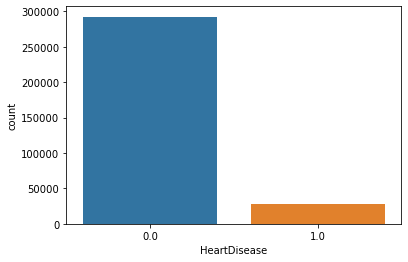

In [54]:
sns.countplot('HeartDisease', data = data)
plt.show()

In [55]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
y = data['HeartDisease']
x = data.drop(['HeartDisease'], axis = 1)

In [56]:
rus = RandomUnderSampler(random_state = 42, replacement = True)
x_rus, y_rus = rus.fit_resample(x, y)

In [57]:
print('original dataset shape:', Counter(y))

original dataset shape: Counter({0.0: 292422, 1.0: 27373})


In [58]:
print('Resample dataset shape', Counter(y_rus))

Resample dataset shape Counter({0.0: 27373, 1.0: 27373})


In [59]:
x_rus

,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,1.0,1.0,0.0,0.000,0.000,0.0,1.0,0.500,0.000,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.333,0.000,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.700,0.000,0.0,0.0,0.333,0.000,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.067,0.067,0.0,0.0,0.750,0.000,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.000,0.000,0.0,1.0,0.833,0.000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54741,0.0,0.0,1.0,1.000,0.500,1.0,0.0,0.583,0.667,1.0,1.0,0.0,0.0
54742,1.0,0.0,0.0,0.000,0.000,1.0,0.0,0.917,0.667,1.0,0.0,0.0,0.0
54743,1.0,0.0,0.0,0.000,0.000,0.0,1.0,0.250,0.000,1.0,0.0,0.0,0.0
54744,1.0,0.0,0.0,0.000,0.000,0.0,0.0,0.667,0.667,1.0,1.0,0.0,0.0


In [60]:
y_rus = y_rus.transpose()
y_rus

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
54741    1.0
54742    1.0
54743    1.0
54744    1.0
54745    1.0
Name: HeartDisease, Length: 54746, dtype: float64

In [61]:
# convert to dataframe
y_rus.to_frame()

,HeartDisease
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
54741,1.0
54742,1.0
54743,1.0
54744,1.0


In [62]:
sampled_data = pd.DataFrame(x_rus)

sampled_data['HeartDisease'] = y_rus

sampled_data

,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,1.0,1.0,0.0,0.000,0.000,0.0,1.0,0.500,0.000,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.333,0.000,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.700,0.000,0.0,0.0,0.333,0.000,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.067,0.067,0.0,0.0,0.750,0.000,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.000,0.000,0.0,1.0,0.833,0.000,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54741,0.0,0.0,1.0,1.000,0.500,1.0,0.0,0.583,0.667,1.0,1.0,0.0,0.0,1.0
54742,1.0,0.0,0.0,0.000,0.000,1.0,0.0,0.917,0.667,1.0,0.0,0.0,0.0,1.0
54743,1.0,0.0,0.0,0.000,0.000,0.0,1.0,0.250,0.000,1.0,0.0,0.0,0.0,1.0
54744,1.0,0.0,0.0,0.000,0.000,0.0,0.0,0.667,0.667,1.0,1.0,0.0,0.0,1.0


In [63]:
sampled_data.to_csv("Sampled_Dataset.csv", index = False)

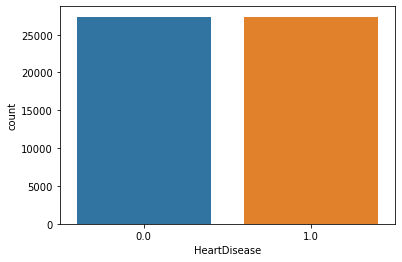

In [66]:
sns.countplot('HeartDisease', data = sampled_data)
plt.show()

We have created a cleaned dataset named 'Sampled_Dataset.csv"